In [2]:
import pyocr
import matplotlib.pyplot as plt

import numpy as np

import cv2
from PIL import Image,ImageEnhance,ImageOps

import re

from pokedex import SETINFO

In [12]:
def preproc_clean(data: list):
    _ = np.array(data)
    return np.expand_dims(_, axis=2).astype("uint8")

In [13]:
def ocr_text(img):
    # img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)

    img = preproc_clean(img).squeeze()
    tools = pyocr.get_available_tools()
    tool = tools[0]
    print(tool)

    builder = pyocr.builders.TextBuilder(tesseract_layout=6)
    # builder.tesseract_configs.append("digits")
    builder.tesseract_configs.append("-c")
    builder.tesseract_configs.append("tessedit_char_whitelist=0123456789/")
    builder.tesseract_configs.append("--psm")
    builder.tesseract_configs.append("6")  # 0~13
    builder.tesseract_configs.append("--oem")
    builder.tesseract_configs.append("3")  # 0~3
    if isinstance(img, np.ndarray):
        img = Image.fromarray(img)
    result = tool.image_to_string(img, lang="eng", builder=builder)
    return result

<module 'pyocr.tesseract' from '/home/aoes/.pyenv/versions/3.10.6/envs/project_pokereader/lib/python3.10/site-packages/pyocr/tesseract.py'>
results 19/111


(60, 141)

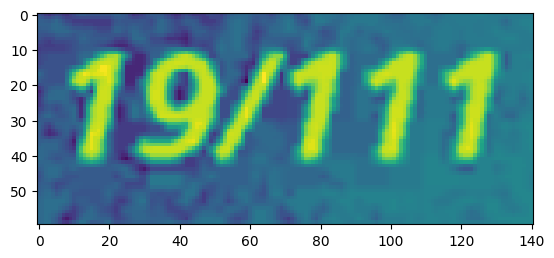

In [19]:
img = Image.open('19_1.png')

img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)

print('results',ocr_text(img))

plt.imshow(img)
np.array(img).shape

In [2]:
df_right = get_augment_data('/home/aoes/code/AoesJP/project_pokereader/PokeData_api/dict_reduceddataset_right.json')


In [3]:
df_left = get_augment_data('/home/aoes/code/AoesJP/project_pokereader/PokeData_api/dict_reduceddataset_left.json')

In [4]:
df_right.head()

,corner,position,set_id,set_name
0,"[[[[154], [154], [154], [154], [154], [154], [...",right,no,no
1,"[[[[154], [154], [154], [154], [154], [154], [...",right,no,no
2,"[[[[191], [191], [191], [191], [191], [191], [...",right,no,no
3,"[[[[154], [154], [154], [154], [154], [154], [...",right,no,no
4,"[[[[153], [153], [153], [154], [154], [154], [...",right,no,no


In [14]:
df_right['set_id'].nunique()

11

In [16]:
%load_ext autoreload
%autoreload 2

from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from PIL import Image
import pandas as pd
from pokedex.prediction import card_prediction_processing
from pokedex.modeling import preprocessing

# Example print statements to ensure everything is loaded correctly
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
TensorFlow version: 2.16.1
NumPy version: 1.26.4


In [28]:
X_train, y_train, X_val, y_val, X_test, y_test, label_encoder = preprocessing('/home/aoes/code/AoesJP/project_pokereader/PokeData_api/dict_reduceddataset_right.json')


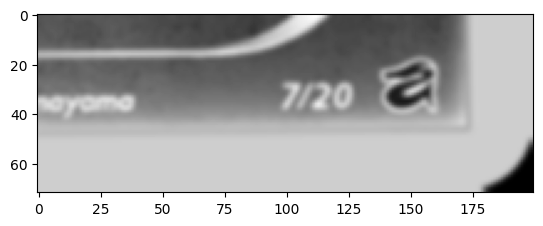

In [29]:
plt.imshow(X_train[2], cmap='gray')
plt.show()

In [8]:
#chatgpt model after several iterations

batch_size = 32
nb_classes =11
nb_epochs = 10

model_l = Sequential([
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(72, 200, 1)),
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(rate=0.25),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.Dropout(rate=0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(nb_classes, activation='softmax')
])

/home/aoes/.pyenv/versions/3.10.6/envs/project_pokereader/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-05-23 11:23:03.897213: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-23 11:23:04.052641: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping register

In [64]:
#Alex's model

batch_size = 32
nb_classes =11
nb_epochs = 10

model_l = Sequential([
    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(72, 200, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(nb_classes, activation='softmax')
])


# batch norm layers

In [19]:
#slimboi left, 17/20

batch_size = 32
nb_classes =11
nb_epochs = 20

model_l = Sequential([
    layers.Conv2D(32, (4,4), activation="relu", input_shape=(72, 200, 1)),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.1),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.1),

    layers.Conv2D(128, (2,2), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(nb_classes, activation='softmax')
])

/home/aoes/.pyenv/versions/3.10.6/envs/project_pokereader/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
#slimboi right, 99%*

batch_size = 32
nb_classes =11
nb_epochs = 20

model_r = Sequential([
    layers.Conv2D(32, (4,4), activation="relu", input_shape=(72, 200, 1)),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.1),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.1),

    layers.Conv2D(128, (2,2), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),
    layers.Dense(nb_classes, activation='softmax')
])

/home/aoes/.pyenv/versions/3.10.6/envs/project_pokereader/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
#Fatboi 17/20

batch_size = 32
nb_classes =11
nb_epochs = 20

model_l = Sequential([
    layers.Conv2D(64, (4,4), activation="relu", input_shape=(72, 200, 1)),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(256, (3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(256, (2,2), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),

    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(nb_classes, activation='softmax')
])

In [31]:
model_r.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 69, 197, 32)    │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 34, 98, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 96, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 16, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 14, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 7, 23, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 7, 23, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 22, 128)     │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 3, 11, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4224)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       270,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,675 (1.64 MB)

 Trainable params: 429,675 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.optimizers import Adam

learning_rate = 0.01  # Set your desired learning rate here

optimizer = Adam(learning_rate=learning_rate)

model_r.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [33]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model_r.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=nb_epochs,
    verbose=1,
    validation_data=(X_val, y_val)
    # callbacks=[early_stopping]
)


Epoch 1/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 17s 67ms/step - accuracy: 0.2664 - loss: 1.9937 - val_accuracy: 0.8171 - val_loss: 0.5330
Epoch 2/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 16s 66ms/step - accuracy: 0.9058 - loss: 0.3174 - val_accuracy: 0.9800 - val_loss: 0.0709
Epoch 3/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9819 - loss: 0.0644 - val_accuracy: 0.9697 - val_loss: 0.0782
Epoch 4/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9898 - loss: 0.0333 - val_accuracy: 0.9988 - val_loss: 0.0096
Epoch 5/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9973 - loss: 0.0106 - val_accuracy: 0.9891 - val_loss: 0.0257
Epoch 6/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9983 - loss: 0.0088 - val_accuracy: 0.9964 - val_loss: 0.0103
Epoch 7/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9992 - loss: 0.0024 - val_accuracy: 0.9939 - val_loss: 0.0187
Epoch 8/20
241/241 ━━━━━━━━━━━━━━━━━━━━ 16s 65ms/step - accuracy: 0.9942 - loss: 0.0184 - 

## *STOP* Save NAO!

In [35]:
model_r.save("pokereader_left99.keras", include_optimizer=True)

In [38]:
import pickle

# Save model
with open('pokereader_right99.pkl', 'wb') as f:
    pickle.dump(model_r, f)


In [37]:
model_l.save('pokereader_left99.h5')


In [15]:
X_test.shape
for filename in X_test:
    print(filename.shape)

(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)
(72, 200, 1)

## Predict array of images

In [34]:
folder_path = '/home/aoes/code/AoesJP/project_pokereader/notebooks/white_back'
pred_list = []
i=0

for filename in X_test:
    # if filename.lower().endswith('.jpg'):  # Check if the file is a .jpg file
    #     # Construct the full file path
    #     file_path = os.path.join(folder_path, filename)

        # # Open the image file
        # png_pil_img = Image.open(file_path)
        # card_image = np.array(png_pil_img)

        # # Resize the image
        # new_array = cv2.resize(card_image, (600, 825))

        # # Process the image
        # graybottomleft, graybottomright = card_prediction_processing(new_array)

        filename = np.expand_dims(filename, 0)
        # print(filename.shape)

        # Make a prediction
        predictions = model_r.predict(filename)
        #return label_encoder.classes_[np.argmax(predictions)]

        # Append predictions and other relevant info to the list
        pred_list.append([label_encoder.classes_[np.argmax(predictions)], y_test[i]])

        i+=1

        # Print the results
        print("Predictions:", predictions)
        print("Class#:", np.argmax(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Predictions: [[2.7869297e-07 9.9999976e-01 1.1250571e-19 6.4046086e-14 1.4473270e-19
  2.9510965e-21 2.9515379e-27 1.4131289e-22 2.7177355e-20 5.0599842e-17
  1.6245368e-13]]
Class#: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predictions: [[0.0000000e+00 2.0789014e-33 0.0000000e+00 3.4093994e-35 2.3280399e-23
  6.2435053e-23 1.2546983e-19 6.3701284e-21 6.2159836e-01 3.7840167e-01
  1.0524963e-32]]
Class#: 8
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predictions: [[2.6001707e-09 1.0000000e+00 7.5867081e-15 1.7700004e-12 6.2879254e-14
  4.6863447e-19 5.3114916e-22 6.7103957e-19 1.6109158e-15 8.2492146e-13
  4.4911345e-12]]
Class#: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predictions: [[1.1765483e-33 3.4624734e-27 1.7767551e-27 3.5623802e-09 2.2450766e-21
  9.2251016e-14 1.0000000e+00 2.7524092e-14 8.5189465e-14 7.0025380e-10
  7.4165053e-15]]
Class#: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predictions: [[9.1866538e-26 3.7171796e-21 5.3032943e-19 2.7865976e-15

## Predict single image

In [26]:
folder_path = '/home/aoes/code/AoesJP/project_pokereader/notebooks/white_back'
pred_list = []

for filename in os.listdir(folder_path):
    if filename.lower().endswith('.jpg'):  # Check if the file is a .jpg file
        # Construct the full file path
        file_path = os.path.join(folder_path, filename)

        # Open the image file
        png_pil_img = Image.open(file_path)
        card_image = np.array(png_pil_img)

        # Resize the image
        new_array = cv2.resize(card_image, (600, 825))

        # Process the image
        graybottomleft, graybottomright = card_prediction_processing(new_array)

        # Make a prediction
        predictions = model_r.predict(graybottomright)
        #return label_encoder.classes_[np.argmax(predictions)]

        # Append predictions and other relevant info to the list
        pred_list.append([predictions, label_encoder.classes_[np.argmax(predictions)], filename])

        # Print the results
        print("Predictions:", predictions)
        print("Class#:", np.argmax(predictions))

(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)
(1, 72, 200, 1)


In [35]:
model_r.evaluate(X_test,y_test)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9966 - loss: 0.0067


[0.004170017316937447, 0.9987878799438477]

In [36]:
label_encoder.classes_

array(['dp1', 'dp2', 'dv1', 'g1', 'no', 'xy1', 'xy2', 'xy3', 'xy4', 'xy6',
       'xy7'], dtype=object)

In [ ]:
label_encoder_left =

In [12]:
pred_list

[['swsh45', array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])],
 ['swsh9', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])],
 ['sv2', array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])],
 ['sv3pt5', array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])],
 ['swsh9', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])],
 ['sv3pt5', array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])],
 ['swsh6', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])],
 ['swsh9', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])],
 ['swsh9', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])],
 ['swsh10', array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])],
 ['swsh9', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])],
 ['swsh45', array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])],
 ['swsh12pt5', array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])],
 ['swsh45', array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])],
 ['swsh12pt5', array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])],
 ['sm4', arra

In [37]:
yes = 0
no = 0

for p in pred_list:
    print(p[0], " ", label_encoder.classes_[np.argmax(p[1])])
    if p[0] == label_encoder.classes_[np.argmax(p[1])]:
        yes+=1
    else:
        no+=1

print('yes =')
print(yes)
print('no =')
print(no)
print('accuracy = ')
print(yes/(yes+no))

dp2   dp2
xy4   xy6
dp2   dp2
xy2   xy2
xy4   xy4
xy1   xy1
xy7   xy7
xy1   xy1
dp2   dp2
dp1   dp1
xy3   xy3
xy1   xy1
no   no
no   no
dv1   dv1
dv1   dv1
xy4   xy4
xy1   xy1
xy2   xy2
xy4   xy4
no   no
dp1   dp1
dp2   dp2
xy2   xy2
xy3   xy3
xy6   xy6
g1   g1
dp2   dp2
xy2   xy2
xy4   xy4
dp2   dp2
g1   g1
xy6   xy6
xy7   xy7
xy4   xy4
dp2   dp2
xy1   xy1
xy6   xy6
xy1   xy1
xy7   xy7
xy2   xy2
dv1   dv1
xy6   xy6
xy6   xy6
xy6   xy6
xy3   xy3
xy4   xy4
xy4   xy4
xy7   xy7
dp1   dp1
xy6   xy6
xy6   xy6
xy7   xy7
xy1   xy1
xy3   xy3
xy1   xy1
g1   g1
no   no
no   no
xy1   xy1
xy2   xy2
xy3   xy3
xy4   xy4
xy6   xy6
xy2   xy2
xy3   xy3
xy7   xy7
no   no
no   no
g1   g1
dp2   dp2
xy2   xy2
no   no
g1   g1
dp2   dp2
g1   g1
xy4   xy4
dp1   dp1
xy2   xy2
xy4   xy4
dv1   dv1
xy3   xy3
xy2   xy2
xy2   xy2
xy7   xy7
no   no
xy3   xy3
no   no
xy7   xy7
dp2   dp2
xy7   xy7
no   no
dp1   dp1
g1   g1
xy7   xy7
dv1   dv1
dp1   dp1
xy3   xy3
dv1   dv1
xy2   xy2
g1   g1
g1   g1
g1   g1
xy3   xy3
xy

In [34]:
from sklearn.metrics import confusion_matrix


y_pred_probabilities = model_l.predict(X_test)

y_true_labels = np.argmax(y_test, axis=1)

y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
Confusion Matrix:
[[175   0   0   0   0   1   0   0   0   0   0]
 [  0 158   0   0   0   0   0   0   0   0   0]
 [  0   0 157   0   0   0   0   0   0   0   0]
 [  0   0   0 144   0   0   0   0   0   0   0]
 [  0   0   0   0 149   0   0   0   0   0   0]
 [  0   0   0   0   0 140   0   0   0   0   0]
 [  0   0   0   0   0   0 123   0   0   0   0]
 [  0   0   0   0   0   0   0 149   0   0   0]
 [  0   0   0   0   0   0   0   0 151   0   0]
 [  0   0   0   0   0   0   0   0   0 144   0]
 [  0   0   0   0   0   0   0   0   0   0 159]]


In [40]:
pred_list=[]

folder_path = 'white_back'

# for filename in os.listdir(folder_path):
#         # Construct the full file path
#         file_path = os.path.join(folder_path, filename)
#         # png_filepath = 'white_back/sm4-76_2.jpg'
#         png_pil_img = Image.open(file_path)
#         card_image = np.array(png_pil_img)
#         new_array = cv2.resize(card_image, (600, 825))
#         graybottomleft, graybottomright = card_prediction_processing(new_array)

#         # Now you can make a prediction
#         predictions = model_l.predict(graybottomleft)
#         pred_list.append([predictions, label_encoder.classes_[np.argmax(predictions)], filename])
#         print("Predictions:", predictions)
#         print("Class#:", np.argmax(predictions))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predictions: [[0.0000000e+00 1.0000000e+00 0.0000000e+00 2.3868345e-31 1.1573043e-34
  0.0000000e+00 2.5247341e-31 1.6017396e-34 5.2427036e-23 0.0000000e+00
  3.3410782e-33]]
Class#: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Predictions: [[0.00000000e+00 9.60737295e-14 3.77102659e-20 5.58856534e-20
  0.00000000e+00 1.06225535e-36 1.31569459e-05 9.71397638e-01
  2.21270430e-30 6.50034334e-13 2.85891891e-02]]
Class#: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predictions: [[0.00000000e+00 1.53886161e-20 1.69774116e-19 4.94411157e-24
  0.00000000e+00 6.41858255e-27 1.92385485e-08 1.75773522e-07
  3.36901513e-19 1.06973286e-16 9.99999881e-01]]
Class#: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predictions: [[4.7958686e-34 1.0000000e+00 2.3376638e-37 5.2785738e-27 2.3329215e-32
  3.5648262e-36 3.6175269e-28 1.4432697e-34 1.1081959e-23 4.0232027e-38
  3.8315759e-32]]
Class#: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Predictions: [[2.8546016e-29 5.1396918e-13 9.99

IsADirectoryError: [Errno 21] Is a directory: '/home/aoes/code/AoesJP/project_pokereader/notebooks/white_back/.ipynb_checkpoints'

In [23]:
label_encoder.classes_[0]

'no'

In [41]:
pred_list

[[array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 2.3868345e-31,
          1.1573043e-34, 0.0000000e+00, 2.5247341e-31, 1.6017396e-34,
          5.2427036e-23, 0.0000000e+00, 3.3410782e-33]], dtype=float32),
  'sm4',
  'sm4-76_2.jpg'],
 [array([[0.00000000e+00, 9.60737295e-14, 3.77102659e-20, 5.58856534e-20,
          0.00000000e+00, 1.06225535e-36, 1.31569459e-05, 9.71397638e-01,
          2.21270430e-30, 6.50034334e-13, 2.85891891e-02]], dtype=float32),
  'swsh12pt5',
  'swsh12pt5-62_2.jpg'],
 [array([[0.00000000e+00, 1.53886161e-20, 1.69774116e-19, 4.94411157e-24,
          0.00000000e+00, 6.41858255e-27, 1.92385485e-08, 1.75773522e-07,
          3.36901513e-19, 1.06973286e-16, 9.99999881e-01]], dtype=float32),
  'swsh9',
  'swsh9-81.jpg'],
 [array([[4.7958686e-34, 1.0000000e+00, 2.3376638e-37, 5.2785738e-27,
          2.3329215e-32, 3.5648262e-36, 3.6175269e-28, 1.4432697e-34,
          1.1081959e-23, 4.0232027e-38, 3.8315759e-32]], dtype=float32),
  'sm4',
  'sm4-76.jpg'],
 [

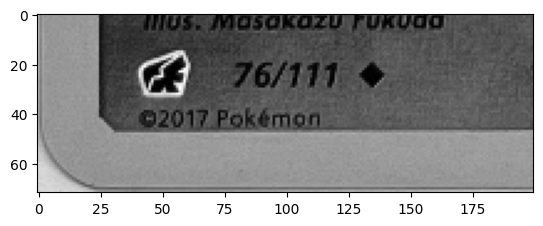

In [40]:
import matplotlib.pyplot as plt

# Assuming graybottomleft contains image data
image_data = graybottomleft.squeeze()  # Remove singleton dimension

# Display the image
plt.imshow(image_data, cmap='gray')
plt.show()

Shape of graybottomleft: (72, 200)
Shape of graybottomleft after reshaping: (1, 72, 200, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Predictions: [[3.0425554e-06 1.5100993e-03 2.3637813e-05 2.5398729e-06 4.5563215e-03
  1.1646397e-06 5.5892356e-06 5.8673337e-05 5.0573699e-02 9.0624422e-01
  3.7020948e-02]]


In [26]:
label_encoder.classes_

array(['no', 'sm4', 'sv2', 'sv3', 'sv3pt5', 'sv4', 'swsh10', 'swsh12pt5',
       'swsh45', 'swsh6', 'swsh9'], dtype=object)

In [27]:
from sklearn.metrics import confusion_matrix


y_pred_probabilities = model_l.predict(XX_val)

y_true_labels = np.argmax(y_val, axis=1)

y_pred_labels = np.argmax(y_pred_probabilities, axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


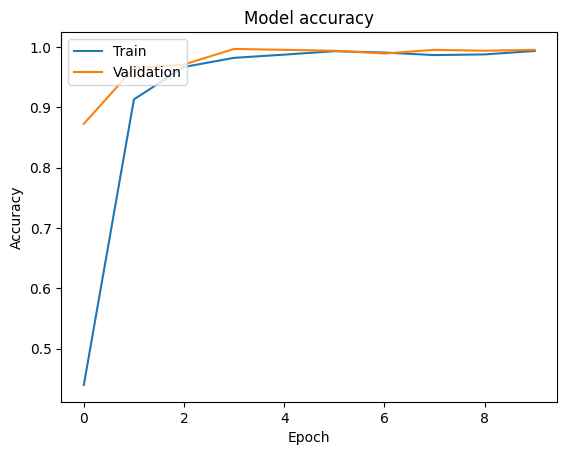

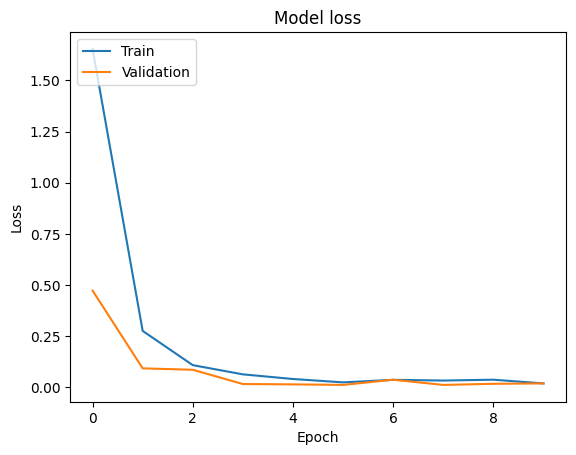

In [43]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and stored the history object
# history = model.fit(...)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1]:
# def crop_card(card_image):
#     """
#     Input is a numpy array
#     crop to (72, 200)
#     """
#     HARD_CODED_HEIGHT = 72
#     HARD_CODED_WIDTH = 200

#     h, w, d = card_image.shape
#     bottomleft = card_image[h-HARD_CODED_HEIGHT:, :HARD_CODED_WIDTH, :]
#     bottomright = card_image[h-HARD_CODED_HEIGHT:, w-HARD_CODED_WIDTH:, :]
#     graybottomleft = cv2.cvtColor(np.array(bottomleft), cv2.COLOR_BGR2GRAY)
#     graybottomright = cv2.cvtColor(np.array(bottomright), cv2.COLOR_BGR2GRAY)

#     # Normalization by dividing by 255
#     graybottomleft_normalized = graybottomleft / 255.0
#     graybottomright_normalized = graybottomright / 255.0

#     return graybottomleft_normalized, graybottomright_normalized

In [2]:
# df_left = get_augment_data('/home/aoes/code/AoesJP/project_pokereader/PokeData_api/dict_reduceddataset_left.json')
# df_left = shuffle(df_left).reset_index(drop=True)
# df_left.head()

In [3]:
# # Initialize LabelEncoder
# label_encoder = LabelEncoder()

# # Fit LabelEncoder to your column
# label_encoder.fit(df_left['set_id'])

# # Transform the column
# df_left['category'] = label_encoder.transform(df_left['set_id'])

# categories = to_categorical(df_left['category'], num_classes = 11)

# categories.shape

In [5]:
# nb_split = int(df_left.shape[0]*.8)
# nb_split

# dfl_train = df_left.iloc[:nb_split]
# dfl_val = df_left.iloc[nb_split:]

# X_train = dfl_train.loc[:,'corner']
# X_val = dfl_val.loc[:,'corner']

# y_train = categories[:nb_split,:]
# y_val = categories[nb_split:,:]

# XX_train = np.empty((nb_split, 72, 200, 1))
# XX_val = np.empty((3300-nb_split, 72, 200, 1))

# for i, x in enumerate(X_train):
#     XX_train[i, :, :, 0] = np.array(x).reshape(72, 200)/255

# for i, x in enumerate(X_val):
#     XX_val[i, :, :, 0] = np.array(x).reshape(72, 200)/255

In [ ]:
# # Assuming graybottomleft is your input data
# # graybottomleft should be a single image with shape (72, 200)
# # If it's not in this shape, you need to reshape it

# # Check the shape of the input
# print("Shape of graybottomleft:", graybottomleft.shape)

# # If the input is a 2D array, reshape it to (72, 200, 1)
# if graybottomleft.ndim == 2 and graybottomleft.shape == (72, 200):
#     graybottomleft = np.expand_dims(graybottomleft, axis=-1)  # Add the channel dimension

# # If the input is a single image, expand dims to add the batch dimension
# if graybottomleft.ndim == 3:
#     graybottomleft = np.expand_dims(graybottomleft, axis=0)  # Add the batch dimension

# # Check the shape again to confirm
# print("Shape of graybottomleft after reshaping:", graybottomleft.shape)

In [26]:
df_left.head(20)

,corner,position,set_id,set_name,category
0,"[[[98], [98], [98], [98], [98], [99], [99], [9...",left,sv4,Paradox Rift,5
1,"[[[[99], [99], [99], [99], [99], [98], [98], [...",left,sv2,Paldea Evolved,2
2,"[[[[153], [153], [153], [154], [154], [154], [...",left,sv2,Paldea Evolved,2
3,"[[[191], [191], [191], [191], [191], [191], [1...",left,swsh6,Chilling Reign,9
4,"[[[155], [155], [154], [154], [154], [154], [1...",left,sv2,Paldea Evolved,2
5,"[[[154], [154], [154], [154], [154], [154], [1...",left,sv3,Obsidian Flames,3
6,"[[[190], [190], [190], [190], [190], [190], [1...",left,no,no,0
7,"[[[[191], [191], [191], [191], [191], [191], [...",left,swsh10,Astral Radiance,6
8,"[[[[135], [135], [135], [135], [135], [135], [...",left,no,no,0
9,"[[[[192], [192], [192], [192], [192], [192], [...",left,swsh45,Shining Fates,8


In [100]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import random
from PIL import Image
import pandas as pd
from pokedex.augmentation import get_augment_data

# Example print statements to ensure everything is loaded correctly
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

TensorFlow version: 2.16.1
NumPy version: 1.26.4


In [101]:
df_right = get_augment_data('/home/aoes/code/AoesJP/project_pokereader/PokeData_api/dict_reduceddataset_right.json')
df_right = shuffle(df_right).reset_index(drop=True)
df_right.head()

,corner,position,set_id,set_name
0,"[[[116], [116], [116], [117], [117], [117], [1...",right,no,no
1,"[[[[157], [154], [154], [153], [157], [157], [...",right,dp2,Mysterious Treasures
2,"[[[206], [206], [206], [206], [207], [207], [2...",right,no,no
3,"[[[49], [49], [49], [50], [50], [50], [51], [5...",right,no,no
4,"[[[[196], [188], [201], [215], [215], [202], [...",right,xy4,Phantom Forces


In [102]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit LabelEncoder to your column
label_encoder.fit(df_right['set_id'])

# Transform the column
df_right['target'] = label_encoder.transform(df_right['set_id'])

df_right.head()

,corner,position,set_id,set_name,target
0,"[[[116], [116], [116], [117], [117], [117], [1...",right,no,no,4
1,"[[[[157], [154], [154], [153], [157], [157], [...",right,dp2,Mysterious Treasures,1
2,"[[[206], [206], [206], [206], [207], [207], [2...",right,no,no,4
3,"[[[49], [49], [49], [50], [50], [50], [51], [5...",right,no,no,4
4,"[[[[196], [188], [201], [215], [215], [202], [...",right,xy4,Phantom Forces,8


In [103]:
nb_split = int(df_right.shape[0]*.8)
nb_split

dfl_train = df_right.iloc[:nb_split]
dfl_val = df_right.iloc[nb_split:]

X_train = dfl_train.loc[:,'corner']
X_val = dfl_val.loc[:,'corner']

y_train = dfl_train.loc[:,'target']
y_val = dfl_val.loc[:,'target']

XX_train = np.empty((nb_split, 72, 200, 1))
XX_val = np.empty((3300-nb_split, 72, 200, 1))

for i, x in enumerate(X_train):
    XX_train[i,:,:,:] = x

for i, x in enumerate(X_val):
    XX_val[i,:,:,:] = x

In [104]:
batch_size = 32
nb_classes =11
nb_epochs = 10

model_r = Sequential([
    layers.Reshape((72, 200, 1), input_shape=(72,200)),
    layers.Rescaling(scale=1./255.),
    layers.Conv2D(32, (5, 5), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(11,  activation='softmax')
])


/home/aoes/.pyenv/versions/3.10.6/envs/project_pokereader/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [105]:
model_r.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [106]:
from tensorflow.keras.callbacks import EarlyStopping

history = model_r.fit(XX_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = nb_epochs,
                    verbose = 1,
                    validation_data = (XX_val, y_val))

Epoch 1/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6891 - loss: 1.4177 - val_accuracy: 0.9152 - val_loss: 0.3088
Epoch 2/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9569 - loss: 0.1881 - val_accuracy: 0.9864 - val_loss: 0.0593
Epoch 3/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9977 - loss: 0.0224 - val_accuracy: 0.9985 - val_loss: 0.0181
Epoch 4/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9994 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0063
Epoch 5/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 1.0000 - loss: 8.7238e-04 - val_accuracy: 1.0000 - val_loss: 0.0024
Epoch 7/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9985 - val_loss: 0.0060
Epoch 8/10
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - accuracy: 0.9998 - loss: 0.0011 - val_accuracy: 1.0000

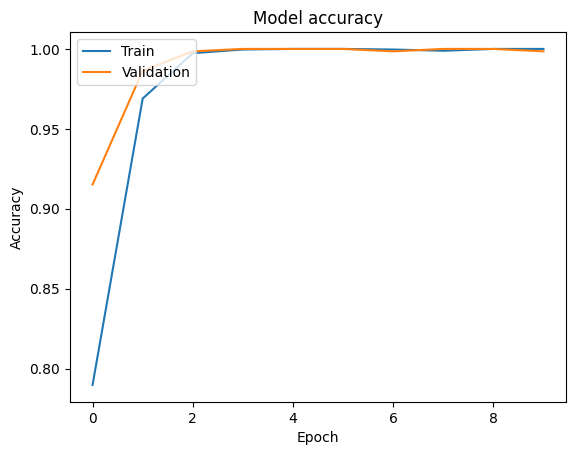

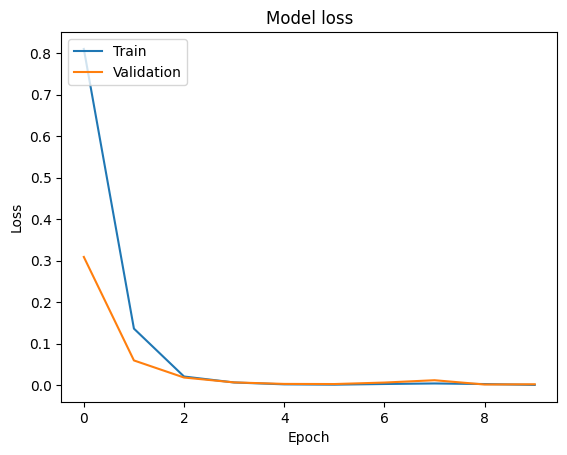

In [107]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and stored the history object
# history = model.fit(...)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()